In [1]:
#ICA 10

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sb

# DATA = brookline.csv
path = '/Users/nicolelubaczewska/Downloads/usedCars (1).csv'

uc = pd.read_csv(path)

uc.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_type,engine_capacity,body_type,drivetrain,price_usd
0,Others,automatic,silver,190000,2010,gasoline,2.5,universal,all,10900.00
1,Others,automatic,blue,290000,2002,gasoline,3.0,universal,all,5000.00
2,Others,automatic,red,402000,2001,gasoline,2.5,suv,all,2800.00
3,Others,automatic,black,280000,2001,gasoline,2.5,universal,all,2134.11
4,Others,automatic,silver,132449,2011,gasoline,2.5,universal,all,14700.00


In [3]:
#1d.

reg1 = smf.ols('price_usd ~ year_produced', data = uc).fit()
reg1.params

Intercept       -1.151630e+06
year_produced    5.782008e+02
dtype: float64

In [7]:
#2.a

reg2 = smf.ols('price_usd ~ transmission', data = uc).fit()
reg2.params


Intercept                     10573.716089
transmission[T.mechanical]    -5521.726353
dtype: float64

In [15]:
#3c.

reg3 = smf.ols('price_usd ~ odometer_value', data = uc).fit()
reg3.params

Intercept         12691.357952
odometer_value       -0.022505
dtype: float64

In [16]:
#4a. 

print(reg1.rsquared)
print(reg2.rsquared)
print(reg3.rsquared)

0.4666367180966854
0.19965388025483333
0.19548292930081013


In [18]:
#5.c

reg5 = smf.ols('price_usd ~ odometer_value + year_produced', data = uc).fit()
reg5.params


Intercept        -1.087816e+06
odometer_value   -3.224448e-03
year_produced     5.467588e+02
dtype: float64

In [21]:
#6.a,b,c

reg5.summary()

#intercept
#odometer
#year_produced

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                 1.460e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:41:11   Log-Likelihood:            -3.2352e+05
No. Observations:               33030   AIC:                         6.470e+05
Df Residuals:                   33027   BIC:                         6.471e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.088e+06   8431.382   -129.020      0.000    -1.1e+06   -1.07e+06
odometer_value    -0.0032      0.000    -12.801      0.000      -0.004      -0.003
year_produced    546.7588      4.189    130.528      0.000     538.549     554.969
==============================================================================
Omnibus:                    19727.258   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           263605.356
Skew:                           2.653   Prob(JB):                         0.00
Kurtosis:                      15.782   Cond. No.                     9.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#7.a.

reg7 = smf.ols('price_usd ~ transmission + C(color) + odometer_value + year_produced', data = uc).fit()
reg7.params

price = 2010*466.209797 + 100000 * -0.002271 -924034.894

price

12819.69796999998

In [46]:
#8.a

reg8 = smf.ols('price_usd ~ color', data = uc).fit()
(reg8.resid > 0).value_counts()

12403/(12403+20627)

0.375507114744172

In [51]:
#9.d.
#white

reg9 = smf.ols('price_usd ~ color', data = uc[uc.body_type == 'suv']).fit()
reg9.params

Intercept          14346.165079
color[T.blue]      -3580.287160
color[T.brown]      1516.133895
color[T.green]     -7619.416632
color[T.grey]       -538.116938
color[T.orange]    -3575.975329
color[T.other]     -2501.708770
color[T.red]       -2486.413627
color[T.silver]    -3975.278016
color[T.violet]    -4743.496105
color[T.white]      2736.698420
color[T.yellow]    -3701.901746
dtype: float64

In [68]:
#10.d. 

uc.corr()['price_usd']

reg10 = smf.ols('price_usd ~ manufacturer_name', data = uc).fit()
reg10.rsquared

0.06974690731764965

In [69]:
#11. b. d.


In [77]:
#12.a,b,c,d

reg11 = smf.ols('price_usd ~ manufacturer_name', data = uc).fit()
reg12Q = smf.ols('price_usd ~ manufacturer_name + odometer_value', data = uc).fit()
reg13Q = smf.ols('price_usd ~ manufacturer_name + color', data = uc).fit()
reg14Q = smf.ols('price_usd ~ manufacturer_name + engine_type', data = uc).fit()
reg15Q= smf.ols('price_usd ~ manufacturer_name + drivetrain', data = uc).fit()

print(reg11.rsquared_adj)
print(reg12Q.rsquared_adj)
print(reg13Q.rsquared_adj)
print(reg14Q.rsquared_adj)
print(reg15Q.rsquared_adj)

0.0694651746507966
0.28557452922875837
0.16803703215167864
0.07666440259174645
0.22365606399979787


In [99]:
#13. b.

uc['age'] = 2019 - uc.year_produced

reg13 = smf.ols('price_usd ~ age', data = uc).fit()
reg14QQ = smf.ols('price_usd ~ age + odometer_value', data = uc).fit()
reg15QQ = smf.ols('price_usd ~ age + odometer_value + engine_capacity', data = uc).fit()

#print(reg13.rsquared_adj)
#print(reg14QQ.rsquared_adj)
#print(reg15QQ.rsquared_adj)

#print(reg11.summary())
#print(reg12Q.summary())
#print(reg13Q.summary())


# (1) odometer value is related with price and age, 
#     any regression with price and age but not odometer_value
#     will suffer from OVB. This eliminates option A

# (2) engine capacity is related with price, but not with
#     age. This variable will not cause OVB and should not
#     be part of the model. This eliminates option C

# (3) Option d is eliminated b/c as long as you have 
#     the correlation matrix you have sufficient information
#     to answer this question.

<AxesSubplot:xlabel='year_produced', ylabel='price_usd'>

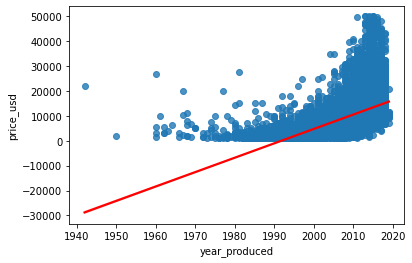

In [100]:
#14 c. d.

uc.corr()[['price_usd', 'year_produced']]

reg14 = smf.ols('price_usd ~ year_produced', data = uc).fit()

sb.regplot(y = uc.price_usd , x = uc.year_produced, line_kws = {'color': 'red'})

# Explanation:

# (1) Option A is not true b/c year_produced is the variable
#     with greatest individual predictive power. You can check
#     this using a correlation matrix (see corr matrix above)

# (2) Option B is a true statement, but we only need to add variables
#     that correct for OVB when designing models for policy making.
#     The description of the question makes it clear that the
#     objective is prediction. In which case the criteria for 
#     adding variables is the change in adjusted R2.

In [101]:
#15d. 